# Explore merchant data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import matplotlib.ticker as tick
import matplotlib as matplotlib
import seaborn as sb
import json

### Import data

In [3]:
orders = pd.read_csv("/Users/daniellaframboise/Documents/Internships/2019/data/orders.csv")
order_items = pd.read_csv("/Users/daniellaframboise/Documents/Internships/2019/data/order_items.csv")

In [4]:
orders.head()

,id,customer,placed_on,total_cost,total_tax,subtotal
0,1,4,2017-03-05 16:55:52,884.34,101.74,782.60
1,2,22,2015-09-05 10:20:52,972.40,111.87,860.53
2,3,19,2016-01-24 11:38:27,105.91,12.18,93.73
3,4,10,2016-04-25 10:43:25,647.20,74.46,572.74
4,5,4,2017-12-02 06:27:31,343.27,39.49,303.78


In [5]:
order_items.head()

,id,order,product_variation,price,quantity
0,1,1,66,9.61,3
1,2,1,1,11.53,2
2,3,1,30,15.35,3
3,4,1,60,72.47,2
4,5,1,13,125.26,3


### Explore merging data

In [6]:
data = orders.merge(order_items, left_on='id', right_on='order')

In [7]:
data.head()

,id_x,customer,placed_on,total_cost,total_tax,subtotal,id_y,order,product_variation,price,quantity
0,1,4,2017-03-05 16:55:52,884.34,101.74,782.6,1,1,66,9.61,3
1,1,4,2017-03-05 16:55:52,884.34,101.74,782.6,2,1,1,11.53,2
2,1,4,2017-03-05 16:55:52,884.34,101.74,782.6,3,1,30,15.35,3
3,1,4,2017-03-05 16:55:52,884.34,101.74,782.6,4,1,60,72.47,2
4,1,4,2017-03-05 16:55:52,884.34,101.74,782.6,5,1,13,125.26,3


In [8]:
data.dtypes

id_x                   int64
customer               int64
placed_on             object
total_cost           float64
total_tax            float64
subtotal             float64
id_y                   int64
order                  int64
product_variation      int64
price                float64
quantity               int64
dtype: object

In [9]:
data['placed_on'] = pd.to_datetime(data['placed_on'])

In [10]:
data.dtypes

id_x                          int64
customer                      int64
placed_on            datetime64[ns]
total_cost                  float64
total_tax                   float64
subtotal                    float64
id_y                          int64
order                         int64
product_variation             int64
price                       float64
quantity                      int64
dtype: object

In [11]:
data = data.rename(index=str, columns={"id_x": "id","id_y": "order_item_id"})

In [12]:
data.head()

,id,customer,placed_on,total_cost,total_tax,subtotal,order_item_id,order,product_variation,price,quantity
0,1,4,2017-03-05 16:55:52,884.34,101.74,782.6,1,1,66,9.61,3
1,1,4,2017-03-05 16:55:52,884.34,101.74,782.6,2,1,1,11.53,2
2,1,4,2017-03-05 16:55:52,884.34,101.74,782.6,3,1,30,15.35,3
3,1,4,2017-03-05 16:55:52,884.34,101.74,782.6,4,1,60,72.47,2
4,1,4,2017-03-05 16:55:52,884.34,101.74,782.6,5,1,13,125.26,3


### Import product data

In [13]:
products = pd.read_csv("/Users/daniellaframboise/Documents/Internships/2019/data/products.csv")
product_variations = pd.read_csv("/Users/daniellaframboise/Documents/Internships/2019/data/product_variations.csv")

In [14]:
products.head()

,id,merchant,name,description,price,sku
0,1,2,Large table,A great table,102.12,8437152631
1,2,11,Cotton t-shirt,100% cotton t-shirt,11.99,1437367336
2,3,3,Wool coat,Sturdy 100% wool,400.50,3977592277
3,4,4,See-through corded telephone,NaN,26.78,8241503020
4,5,3,V-neck t-shirt,100% cotton,10.00,4556771762


In [15]:
product_variations.head()

,id,product,name
0,1,2,Red
1,2,11,Small
2,3,10,Green
3,4,23,Checkered
4,5,10,Blue


In [16]:
# Drop columns that won't be used
products.drop(['description', 'sku'], inplace=True, axis=1)

In [17]:
products.head()

,id,merchant,name,price
0,1,2,Large table,102.12
1,2,11,Cotton t-shirt,11.99
2,3,3,Wool coat,400.50
3,4,4,See-through corded telephone,26.78
4,5,3,V-neck t-shirt,10.00


### Merge data with product_variations

In [18]:
data = data.merge(product_variations, left_on='product_variation', right_on='id')

In [19]:
data.head()

,id_x,customer,placed_on,total_cost,total_tax,subtotal,order_item_id,order,product_variation,price,quantity,id_y,product,name
0,1,4,2017-03-05 16:55:52,884.34,101.74,782.60,1,1,66,9.61,3,66,37,Sandalwood
1,22,18,2014-08-21 21:26:03,200.70,23.09,177.61,120,22,66,9.08,1,66,37,Sandalwood
2,26,22,2015-05-22 03:54:27,676.10,77.78,598.32,141,26,66,9.29,1,66,37,Sandalwood
3,29,20,2017-10-06 09:21:19,120.93,13.91,107.02,157,29,66,9.74,2,66,37,Sandalwood
4,30,3,2017-01-26 18:49:36,221.29,25.46,195.83,160,30,66,9.63,1,66,37,Sandalwood


In [20]:
data = data.rename(index=str, columns={"id_x": "id","id_y": "prod_var_id"})

In [21]:
data.head()

,id,customer,placed_on,total_cost,total_tax,subtotal,order_item_id,order,product_variation,price,quantity,prod_var_id,product,name
0,1,4,2017-03-05 16:55:52,884.34,101.74,782.60,1,1,66,9.61,3,66,37,Sandalwood
1,22,18,2014-08-21 21:26:03,200.70,23.09,177.61,120,22,66,9.08,1,66,37,Sandalwood
2,26,22,2015-05-22 03:54:27,676.10,77.78,598.32,141,26,66,9.29,1,66,37,Sandalwood
3,29,20,2017-10-06 09:21:19,120.93,13.91,107.02,157,29,66,9.74,2,66,37,Sandalwood
4,30,3,2017-01-26 18:49:36,221.29,25.46,195.83,160,30,66,9.63,1,66,37,Sandalwood


### Merge data on products

In [22]:
data = data.merge(products, left_on='product', right_on='id')

In [23]:
data.head()

,id_x,customer,placed_on,total_cost,total_tax,subtotal,order_item_id,order,product_variation,price_x,quantity,prod_var_id,product,name_x,id_y,merchant,name_y,price_y
0,1,4,2017-03-05 16:55:52,884.34,101.74,782.60,1,1,66,9.61,3,66,37,Sandalwood,37,4,Wooden bowl,10.0
1,22,18,2014-08-21 21:26:03,200.70,23.09,177.61,120,22,66,9.08,1,66,37,Sandalwood,37,4,Wooden bowl,10.0
2,26,22,2015-05-22 03:54:27,676.10,77.78,598.32,141,26,66,9.29,1,66,37,Sandalwood,37,4,Wooden bowl,10.0
3,29,20,2017-10-06 09:21:19,120.93,13.91,107.02,157,29,66,9.74,2,66,37,Sandalwood,37,4,Wooden bowl,10.0
4,30,3,2017-01-26 18:49:36,221.29,25.46,195.83,160,30,66,9.63,1,66,37,Sandalwood,37,4,Wooden bowl,10.0


In [24]:
data = data.rename(index=str, columns={
    "id_x": "id",
    "price_x": "price",
    'name_x': 'variation_name',
    'name_y': 'name',
    'price_y': 'current_price',
    'product': 'product_id'
})

In [25]:
data.head()

,id,customer,placed_on,total_cost,total_tax,subtotal,order_item_id,order,product_variation,price,quantity,prod_var_id,product_id,variation_name,id_y,merchant,name,current_price
0,1,4,2017-03-05 16:55:52,884.34,101.74,782.60,1,1,66,9.61,3,66,37,Sandalwood,37,4,Wooden bowl,10.0
1,22,18,2014-08-21 21:26:03,200.70,23.09,177.61,120,22,66,9.08,1,66,37,Sandalwood,37,4,Wooden bowl,10.0
2,26,22,2015-05-22 03:54:27,676.10,77.78,598.32,141,26,66,9.29,1,66,37,Sandalwood,37,4,Wooden bowl,10.0
3,29,20,2017-10-06 09:21:19,120.93,13.91,107.02,157,29,66,9.74,2,66,37,Sandalwood,37,4,Wooden bowl,10.0
4,30,3,2017-01-26 18:49:36,221.29,25.46,195.83,160,30,66,9.63,1,66,37,Sandalwood,37,4,Wooden bowl,10.0


In [26]:
# Drop unused columns
data.drop(['order', 'id_y', 'product_variation'], inplace=True, axis=1)

In [27]:
data.head()

,id,customer,placed_on,total_cost,total_tax,subtotal,order_item_id,price,quantity,prod_var_id,product_id,variation_name,merchant,name,current_price
0,1,4,2017-03-05 16:55:52,884.34,101.74,782.60,1,9.61,3,66,37,Sandalwood,4,Wooden bowl,10.0
1,22,18,2014-08-21 21:26:03,200.70,23.09,177.61,120,9.08,1,66,37,Sandalwood,4,Wooden bowl,10.0
2,26,22,2015-05-22 03:54:27,676.10,77.78,598.32,141,9.29,1,66,37,Sandalwood,4,Wooden bowl,10.0
3,29,20,2017-10-06 09:21:19,120.93,13.91,107.02,157,9.74,2,66,37,Sandalwood,4,Wooden bowl,10.0
4,30,3,2017-01-26 18:49:36,221.29,25.46,195.83,160,9.63,1,66,37,Sandalwood,4,Wooden bowl,10.0


### Begin Plotting

In [28]:
# Start with item #37 - A wooden bowl
wooden_bowls = data.loc[data['product_id'] == 37]

In [29]:
wooden_bowls.describe()

,id,customer,total_cost,total_tax,subtotal,order_item_id,price,quantity,prod_var_id,product_id,merchant,current_price
count,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.0,34.0,34.0
mean,83.500000,16.235294,608.876765,70.048235,538.828529,456.705882,9.326471,2.088235,66.705882,37.0,4.0,10.0
std,56.966896,9.204936,353.097607,40.622529,312.475078,303.364320,0.284795,0.865768,0.970143,0.0,0.0,0.0
min,1.000000,1.000000,37.530000,4.320000,33.210000,1.000000,8.930000,1.000000,66.000000,37.0,4.0,10.0
25%,33.750000,7.250000,395.297500,45.477500,349.820000,193.000000,9.092500,1.000000,66.000000,37.0,4.0,10.0
50%,56.500000,18.500000,574.670000,66.110000,508.560000,319.500000,9.260000,2.000000,66.000000,37.0,4.0,10.0
75%,134.000000,23.000000,871.492500,100.260000,771.232500,724.000000,9.497500,3.000000,68.000000,37.0,4.0,10.0
max,195.000000,31.000000,1621.440000,186.540000,1434.900000,1036.000000,9.970000,3.000000,68.000000,37.0,4.0,10.0


In [30]:
# Sort dataframe by date
wooden_bowls.sort_values(by=['placed_on'], inplace=True, ascending=True)

/Users/daniellaframboise/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [31]:
wooden_bowls.head()

,id,customer,placed_on,total_cost,total_tax,subtotal,order_item_id,price,quantity,prod_var_id,product_id,variation_name,merchant,name,current_price
18,147,27,2014-02-16 16:09:51,1054.78,121.35,933.43,794,8.93,3,66,37,Sandalwood,4,Wooden bowl,10.0
31,150,11,2014-02-17 01:25:58,795.57,91.53,704.04,818,8.99,3,68,37,Pine,4,Wooden bowl,10.0
11,48,22,2014-04-16 14:31:36,1001.82,115.25,886.57,278,9.00,2,66,37,Sandalwood,4,Wooden bowl,10.0
17,143,31,2014-06-14 15:30:40,149.95,17.25,132.70,764,9.03,3,66,37,Sandalwood,4,Wooden bowl,10.0
10,44,23,2014-08-15 16:54:29,1062.69,122.26,940.43,262,9.13,1,66,37,Sandalwood,4,Wooden bowl,10.0


#### Quick example to show how to get mean, std, min, max, etc by year

In [32]:
# Isolate the wooden bowls for the year 2014 only
wooden_bowls_2014 = wooden_bowls[wooden_bowls['placed_on'].dt.year == 2014]

In [33]:
# Get the mean of each column
wooden_bowls_2014.mean()

id               108.928571
customer          20.142857
total_cost       640.531429
total_tax         73.690000
subtotal         566.841429
order_item_id    593.642857
price              9.075714
quantity           2.285714
prod_var_id       66.714286
product_id        37.000000
merchant           4.000000
current_price     10.000000
dtype: float64

In [34]:
# Isolate and get only mean of price
wooden_bowls_2014['price'].mean()

9.075714285714287

#### Back to plotting

In [35]:
list_of_datetimes = wooden_bowls['placed_on']

In [36]:
prices = wooden_bowls['price']

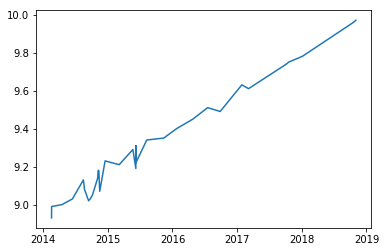

In [37]:
plt.plot(list_of_datetimes, prices)

### Plot another item

In [38]:
wool_coats = data.loc[data['product_id'] == 3]

In [39]:
wool_coats.sort_values(by=['placed_on'], inplace=True, ascending=True)

/Users/daniellaframboise/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [40]:
# Use describe to get all the statistical info
wool_coats['price'].describe()

count     21.000000
mean     377.160476
std       13.534330
min      359.420000
25%      365.700000
50%      374.860000
75%      390.960000
max      400.020000
Name: price, dtype: float64

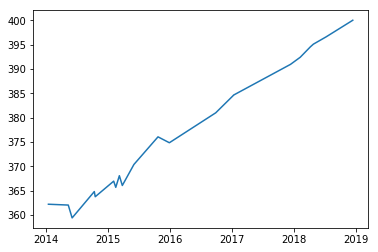

In [41]:
list_of_datetimes = wool_coats[['placed_on']]
prices = wool_coats['price']
plt.plot(list_of_datetimes, prices)

### Attempt to return data as json

In [42]:
 stats_data = wool_coats['price'].describe()

In [43]:
print(type(stats_data))

<class 'pandas.core.series.Series'>


In [44]:
json_data = stats_data.to_json()

In [45]:
print(json_data)

{"count":21.0,"mean":377.1604761905,"std":13.5343302295,"min":359.42,"25%":365.7,"50%":374.86,"75%":390.96,"max":400.02}


### Just for fun, train a linear model based only on dates and prices

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [47]:
# Need to change datetime[64s] to float for linear regressor model
list_of_datetimes['date_delta'] = (list_of_datetimes['placed_on'] - list_of_datetimes['placed_on'].min()) / np.timedelta64(1,'D')
list_of_datetimes['date_delta']

/Users/daniellaframboise/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


1017       0.000000
1009     116.913808
1015     139.621644
1007     270.279734
1002     275.663796
1001     384.392025
1013     396.635104
1004     417.860764
1014     435.230266
1018     503.635185
1005     645.482639
1003     712.391620
1006     985.548519
1010    1089.620394
1011    1089.620394
1008    1425.893322
1000    1483.216088
1012    1542.654711
1016    1560.655451
998     1635.272049
999     1792.673484
Name: date_delta, dtype: float64

In [48]:
X = list_of_datetimes['date_delta']
y = prices
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [49]:
# Instantiate linear regression model for wool coats
wool_coat_reg = LinearRegression()

In [50]:
X_test

1017       0.000000
1012    1542.654711
1008    1425.893322
1009     116.913808
Name: date_delta, dtype: float64

In [51]:
X_train

1014     435.230266
1001     384.392025
1003     712.391620
1007     270.279734
1016    1560.655451
1000    1483.216088
1010    1089.620394
1015     139.621644
1018     503.635185
999     1792.673484
1002     275.663796
1006     985.548519
1004     417.860764
1005     645.482639
1011    1089.620394
998     1635.272049
1013     396.635104
Name: date_delta, dtype: float64

In [52]:
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)


/Users/daniellaframboise/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.
/Users/daniellaframboise/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  
/Users/daniellaframboise/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/daniellaframboise/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.


In [53]:
wool_coat_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [54]:
wool_coat_reg.predict(X_test)

array([[357.51869514],
       [394.66800641],
       [391.85622673],
       [360.3341453 ]])

In [55]:
wool_coat_reg.predict(139.621644)

array([[360.88098217]])

In [56]:
data.head()

,id,customer,placed_on,total_cost,total_tax,subtotal,order_item_id,price,quantity,prod_var_id,product_id,variation_name,merchant,name,current_price
0,1,4,2017-03-05 16:55:52,884.34,101.74,782.60,1,9.61,3,66,37,Sandalwood,4,Wooden bowl,10.0
1,22,18,2014-08-21 21:26:03,200.70,23.09,177.61,120,9.08,1,66,37,Sandalwood,4,Wooden bowl,10.0
2,26,22,2015-05-22 03:54:27,676.10,77.78,598.32,141,9.29,1,66,37,Sandalwood,4,Wooden bowl,10.0
3,29,20,2017-10-06 09:21:19,120.93,13.91,107.02,157,9.74,2,66,37,Sandalwood,4,Wooden bowl,10.0
4,30,3,2017-01-26 18:49:36,221.29,25.46,195.83,160,9.63,1,66,37,Sandalwood,4,Wooden bowl,10.0


### Average annual price increase of all products

In [73]:
years = [2014, 2015, 2016, 2017, 2018]
for x in range(1, 38):
    prod = data.loc[data['product_id'] == x] # Get all the prodcuts with corresponding ID
    prod.sort_values(by=['placed_on'], inplace=True, ascending=True) # Sort them by year
    print('Item Name:' + str(prod['name']))
    for iyear in years:
        prod_by_year = prod[prod['placed_on'].dt.year == iyear]
        print('Mean price for year ' + str(iyear) + ' is ' + str(prod_by_year['price'].mean()))
    print('\n')

/Users/daniellaframboise/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


Item Name:842    Large table
840    Large table
830    Large table
838    Large table
841    Large table
839    Large table
833    Large table
834    Large table
832    Large table
837    Large table
843    Large table
844    Large table
836    Large table
831    Large table
835    Large table
Name: name, dtype: object
Mean price for year 2014 is 91.55
Mean price for year 2015 is 94.2025
Mean price for year 2016 is 96.1966666667
Mean price for year 2017 is 99.12
Mean price for year 2018 is 101.46


Item Name:47    Cotton t-shirt
62    Cotton t-shirt
50    Cotton t-shirt
41    Cotton t-shirt
68    Cotton t-shirt
48    Cotton t-shirt
69    Cotton t-shirt
36    Cotton t-shirt
44    Cotton t-shirt
66    Cotton t-shirt
64    Cotton t-shirt
63    Cotton t-shirt
67    Cotton t-shirt
38    Cotton t-shirt
61    Cotton t-shirt
45    Cotton t-shirt
58    Cotton t-shirt
60    Cotton t-shirt
59    Cotton t-shirt
65    Cotton t-shirt
55    Cotton t-shirt
37    Cotton t-shirt
49    Cotton t-shirt
35 

Item Name:1055    Stainless steel flower pot
1041    Stainless steel flower pot
1052    Stainless steel flower pot
1042    Stainless steel flower pot
1051    Stainless steel flower pot
1043    Stainless steel flower pot
1050    Stainless steel flower pot
1048    Stainless steel flower pot
1056    Stainless steel flower pot
1047    Stainless steel flower pot
1046    Stainless steel flower pot
1040    Stainless steel flower pot
1053    Stainless steel flower pot
1045    Stainless steel flower pot
1049    Stainless steel flower pot
1054    Stainless steel flower pot
1044    Stainless steel flower pot
Name: name, dtype: object
Mean price for year 2014 is 4.52875
Mean price for year 2015 is 4.62
Mean price for year 2016 is 4.74
Mean price for year 2017 is 4.82666666667
Mean price for year 2018 is 4.945


Item Name:594    Instant camera
580    Instant camera
601    Instant camera
587    Instant camera
583    Instant camera
585    Instant camera
598    Instant camera
584    Instant camera
581

Item Name:534    Copper string of decorative lights
541    Copper string of decorative lights
540    Copper string of decorative lights
537    Copper string of decorative lights
535    Copper string of decorative lights
539    Copper string of decorative lights
533    Copper string of decorative lights
538    Copper string of decorative lights
536    Copper string of decorative lights
542    Copper string of decorative lights
Name: name, dtype: object
Mean price for year 2014 is 22.7233333333
Mean price for year 2015 is 23.28
Mean price for year 2016 is 23.6766666667
Mean price for year 2017 is nan
Mean price for year 2018 is 24.75


Item Name:634    Salt & pepper shakers
626    Salt & pepper shakers
629    Salt & pepper shakers
635    Salt & pepper shakers
631    Salt & pepper shakers
632    Salt & pepper shakers
625    Salt & pepper shakers
637    Salt & pepper shakers
638    Salt & pepper shakers
628    Salt & pepper shakers
630    Salt & pepper shakers
627    Salt & pepper shakers


Item Name:219    Small hand-woven rug
222    Small hand-woven rug
187    Small hand-woven rug
209    Small hand-woven rug
185    Small hand-woven rug
186    Small hand-woven rug
199    Small hand-woven rug
183    Small hand-woven rug
220    Small hand-woven rug
205    Small hand-woven rug
225    Small hand-woven rug
226    Small hand-woven rug
215    Small hand-woven rug
207    Small hand-woven rug
213    Small hand-woven rug
177    Small hand-woven rug
191    Small hand-woven rug
208    Small hand-woven rug
175    Small hand-woven rug
192    Small hand-woven rug
224    Small hand-woven rug
193    Small hand-woven rug
176    Small hand-woven rug
198    Small hand-woven rug
180    Small hand-woven rug
201    Small hand-woven rug
218    Small hand-woven rug
203    Small hand-woven rug
178    Small hand-woven rug
179    Small hand-woven rug
223    Small hand-woven rug
181    Small hand-woven rug
200    Small hand-woven rug
195    Small hand-woven rug
214    Small hand-woven rug
196    Sma